In [44]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import random

from load_data import load_data, load_test_data

%matplotlib inline
%reload_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Load and Transform Data for performance
---

In [45]:
X_train, y_train, X_val, y_val = [_.values for _ in load_data('train.csv', 1000)]

In [46]:
def normalize_data(data):
    # Zero center it
    data = data - data.mean(axis=0)
    
# for thing in [X_train, X_val]: normalize_data(thing)

Test gradient and loss function on toy data
---

In [47]:
from neural_net import TwoLayerNet

N, D = X_train.shape
H = 30
C = 10
network = TwoLayerNet(D, H, C)

# network.loss(X_train, y_train)

In [48]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])

loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
Difference between your loss and correct loss:
1.7985612998927536e-13


Train on test data with random hyperparameters
---

In [49]:
input_size = 784
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=128,
            learning_rate=2e-4, learning_rate_decay=0.95,
            reg=1, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302983
iteration 100 / 1000: loss 2.299978
iteration 200 / 1000: loss 2.162781
iteration 300 / 1000: loss 1.470728
iteration 400 / 1000: loss 1.040808
iteration 500 / 1000: loss 0.826543
iteration 600 / 1000: loss 0.807276
iteration 700 / 1000: loss 0.592969
iteration 800 / 1000: loss 0.621248
iteration 900 / 1000: loss 0.592060
Validation accuracy:  0.887


Visualize loss and weights
---

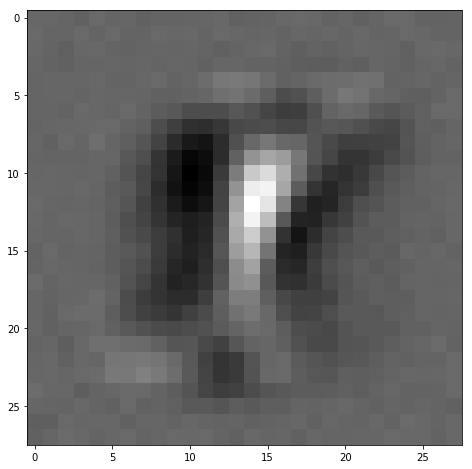

In [51]:
w1 = net.params['W1']
# 50 neurons with there own opinions on what is going on
# Let us see the first neuron's weight matrix visualized

plt.imshow(w1.T.reshape((-1, 28, 28))[36])

In [9]:
np.arange(18).reshape((-1, 3, 3))[0]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Optimizing hyperparameters via grid search
---

In [52]:
import time
import copy

eta_range = np.linspace(1e-4, 1e-3, 10)
reg_range = np.linspace(0, 1, 5)

best_val_acc = -1
best_model = None
i = 1
for eta in eta_range:
    for reg in reg_range:
        print(f'Grid search on point {i}; ',end=''); i += 1;

        tic = time.time()
        net = TwoLayerNet(input_size, hidden_size, num_classes)
        stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=1500, batch_size=100,
                            learning_rate=eta, learning_rate_decay=0.9,
                            reg=reg, verbose=False)

        val_acc = (net.predict(X_val) == y_val).mean()
        train_acc = (net.predict(X_train) == y_train).mean()
        toc = time.time()

        print(f'Took {toc-tic} time')

        if val_acc > best_val_acc:
            best_model = copy.deepcopy(net)
            best_val_acc = val_acc

            print(f'New best model with val_acc: {val_acc}. Train acc: {train_acc}')
            print(f'Learning rate: {eta}, regularisation: {reg}')

print("Done")
print(best_val_acc, " is the best validation accuracy attained")

Grid search on point 1; 

KeyboardInterrupt: 

Load and process test data
---

In [53]:
X_test = load_test_data("test.csv")

In [54]:
test_result = pd.DataFrame()
test_result['Label'] = best_model.predict(X_test)
test_result.index += 1
test_result.index.name = "ImageId"

test_result.head()

AttributeError: 'NoneType' object has no attribute 'predict'

In [13]:
test_result.to_csv("submission.csv")

In [55]:
input_size = 784
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=2000, batch_size=500,
            learning_rate=0.0006, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 2000: loss 2.302694
iteration 100 / 2000: loss 1.704068
iteration 200 / 2000: loss 0.668038
iteration 300 / 2000: loss 0.480901
iteration 400 / 2000: loss 0.391830
iteration 500 / 2000: loss 0.414522
iteration 600 / 2000: loss 0.373165
iteration 700 / 2000: loss 0.455062
iteration 800 / 2000: loss 0.397023
iteration 900 / 2000: loss 0.383999
iteration 1000 / 2000: loss 0.378362
iteration 1100 / 2000: loss 0.340717
iteration 1200 / 2000: loss 0.357511
iteration 1300 / 2000: loss 0.381479
iteration 1400 / 2000: loss 0.391809
iteration 1500 / 2000: loss 0.353288
iteration 1600 / 2000: loss 0.320444
iteration 1700 / 2000: loss 0.377546
iteration 1800 / 2000: loss 0.419654
iteration 1900 / 2000: loss 0.393481
Validation accuracy:  0.912


Validation and training accuracy plots
===

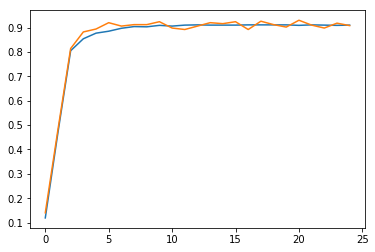

In [15]:
plt.plot(stats['val_acc_history'])
plt.plot(stats['train_acc_history'])

In [141]:
test_result = pd.DataFrame()
test_result['Label'] = net.predict(X_test)
test_result.index += 1
test_result.index.name = "ImageId"

test_result.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3


In [142]:
test_result.to_csv("submission.csv")